<b>Exercise: Implementing Polynomial Regression from Scratch with Diabetes Dataset</b>


<b>Objective:</b>

Implement polynomial regression from scratch using the Diabetes dataset to understand how to extend linear regression for capturing non-linear relationships.

<b>Step 1: Load and Explore the Dataset</b>

Load the Diabetes dataset and explore its features. Familiarize yourself with the dataset structure and the target variable (disease progression one year after baseline).

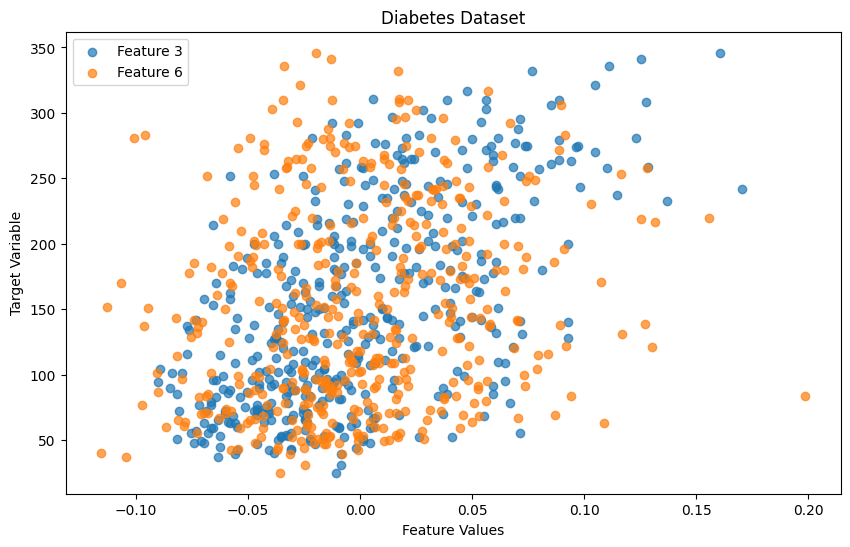

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()
data, target = diabetes.data, diabetes.target

# Visualize the dataset
plt.figure(figsize=(10, 6))

# Select two features for illustration (you can modify this based on your preference)
feature1_index = 2
feature2_index = 5

plt.scatter(data[:, feature1_index], target, label=f'Feature {feature1_index + 1}', alpha=0.7)
plt.scatter(data[:, feature2_index], target, label=f'Feature {feature2_index + 1}', alpha=0.7)

plt.title("Diabetes Dataset")
plt.xlabel("Feature Values")
plt.ylabel("Target Variable")
plt.legend()
plt.show()

In [2]:
import pandas as pd

# Create a DataFrame
columns = [f"Feature_{i}" for i in range(1, data.shape[1] + 1)]
df = pd.DataFrame(data, columns=columns)
df["Target"] = target

# Display the DataFrame
print(df.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.038076   0.050680   0.061696   0.021872  -0.044223  -0.034821   
1  -0.001882  -0.044642  -0.051474  -0.026328  -0.008449  -0.019163   
2   0.085299   0.050680   0.044451  -0.005670  -0.045599  -0.034194   
3  -0.089063  -0.044642  -0.011595  -0.036656   0.012191   0.024991   
4   0.005383  -0.044642  -0.036385   0.021872   0.003935   0.015596   

   Feature_7  Feature_8  Feature_9  Feature_10  Target  
0  -0.043401  -0.002592   0.019907   -0.017646   151.0  
1   0.074412  -0.039493  -0.068332   -0.092204    75.0  
2  -0.032356  -0.002592   0.002861   -0.025930   141.0  
3  -0.036038   0.034309   0.022688   -0.009362   206.0  
4   0.008142  -0.002592  -0.031988   -0.046641   135.0  


<b>Step 2: Split the Dataset</b>

Split the dataset into training and testing sets. This will allow us to train the model on one subset and evaluate its performance on another.

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

print(X_test)

[[ 0.04534098 -0.04464164 -0.00620595 -0.01599898  0.1250187   0.1251981
   0.019187    0.03430886  0.03243232 -0.0052198 ]
 [ 0.09256398 -0.04464164  0.03690653  0.02187239 -0.02496016 -0.01665815
   0.00077881 -0.03949338 -0.02251653 -0.02178823]
 [ 0.06350368  0.05068012 -0.00405033 -0.01255612  0.10300346  0.04878988
   0.05600338 -0.00259226  0.08449153 -0.01764613]
 [ 0.09619652 -0.04464164  0.0519959   0.07926471  0.05484511  0.03657709
  -0.07653559  0.14132211  0.09864806  0.06105391]
 [ 0.01264814  0.05068012 -0.02021751 -0.00222757  0.03833367  0.05317395
  -0.00658447  0.03430886 -0.00514219 -0.00936191]
 [ 0.0090156  -0.04464164 -0.02452876 -0.02632753  0.0988756   0.0941964
   0.07072993 -0.00259226 -0.02139531  0.00720652]
 [-0.00914709  0.05068012  0.17055523  0.01498668  0.03007796  0.03375875
  -0.02131102  0.03430886  0.03365381  0.03205916]
 [-0.02367725  0.05068012  0.04552903  0.02187239  0.10988322  0.08887288
   0.00077881  0.03430886  0.0741909   0.06105391]
 [

In [4]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b>Step 3: Implement Polynomial Features Function</b>

Implement a function to transform the input features into polynomial features of a given degree. This function will take the original features and create new features by raising them to different powers.

In [5]:
def polynomial_features(X, degree):
    # Your implementation here
    """
    Generate polynomial features for input X up to the specified degree.

    Parameters:
    - X: Input features
    - degree: Degree of the polynomial

    Returns:
    - X_poly: Transformed features with polynomial features
    """
    X_poly = np.column_stack([X ** i for i in range(1, degree + 1)]) # exemple :  if X is a 1D array [a, b, c] and degree is 3 
                                                                     # will generate a 2D array: [[a, a^2,a^3], 
                                                                     #                            [b, b^2,b^3], 
                                                                     #                            [c, c^2, c^3]]

    return X_poly

<b>Step 4: Implement Polynomial Regression Class</b>

Create a class for polynomial linear regression with methods for fitting the model and making predictions. Use mean squared error as the cost function and gradient descent for optimization.

In [6]:
class PolynomialRegression:
    def __init__(self, degree, learning_rate=0.001, n_iterations=100):
        # Your initialization code here
        self.degree = degree
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
    
    def polynomial_features(self, X):
        # Your implementation here (use the function from Step 3)
        """
        Generate polynomial features for input X up to the specified degree.

        Parameters:
        - X: Input features

        Returns:
        - X_poly: Transformed features with polynomial features
        """
        X_poly = polynomial_features(X, self.degree)
        return X_poly
    
    def fit(self, X, y):
        """
        Fit the polynomial regression model to the training data.

        Parameters:
        - X: Input features
        - y: Target variable
        """
        X_poly = self.polynomial_features(X)
        m, n = X_poly.shape
        
        # Initialize weights with zeros
        self.weights = np.zeros(n)
        
        # Gradient Descent
        for _ in range(self.n_iterations):
            predictions = np.dot(X_poly, self.weights)
            errors = predictions - y
            gradient = 2 / m * np.dot(X_poly.T, errors)
            self.weights -= self.learning_rate * gradient
    
    def predict(self, X):
        """
        Make predictions using the trained polynomial regression model.

        Parameters:
        - X: Input features

        Returns:
        - predictions: Predicted values
        """
        X_poly = self.polynomial_features(X)
        predictions = np.dot(X_poly, self.weights)
        return predictions

<b>Step 5: Train and Evaluate the Model</b>

Instantiate the <i>'PolynomialRegression'</i> class, fit the model to the training set, and evaluate its performance on the test set.

In [7]:
# Instantiate and train the polynomial regression model
model = PolynomialRegression(degree=2, learning_rate=0.001, n_iterations=100)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model (calculate and print mean squared error)
mse = np.mean((predictions - y_test) ** 2)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 6760.531638728654
